In [247]:
import geopandas as gpd
import pandas
from pyproj import CRS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pycountry

In [248]:
#cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#print(countries.head())
df_countries = pd.DataFrame(countries)

objects = pd.read_csv('./startup-investments/objects.csv')
pd.set_option('display.max_columns', None)
objects.head()

population = pd.read_csv('./populationByCountry/population_by_country_2020.csv')
pd.set_option('display.max_columns', None)
population.head()
df_population = pd.DataFrame(population)
df_population

C:\Users\nicoi\AppData\Local\Temp\ipykernel_146664\2560641833.py:6: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv('./startup-investments/objects.csv')


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [249]:
df_objects = objects[['id','entity_type','country_code']]

# only select Companies (get rid of people or other entities)
df_companies = df_objects.loc[df_objects['entity_type'] == 'Company']
df_companies = df_companies.drop('entity_type', axis=1)

df_companies = df_companies.dropna()
print("Got " + str(df_companies.shape[0]) + " datapoints")
df_companies.head(20)

Got 87990 datapoints


,id,country_code
0,c:1,USA
1,c:10,USA
2,c:100,USA
5,c:10002,MAR
6,c:10003,IND
8,c:10005,USA
12,c:10009,USA
13,c:1001,USA
15,c:10011,USA
18,c:10014,USA


In [250]:
df_companies = df_companies.rename(columns={"country_code":"iso_a3"})
#print(df_companies)

df_groupByCount = df_companies.groupby(['iso_a3']).size()
#df_groupByCount.columns = ['iso_a3', 'count']
df_groupByCount

iso_a3
AFG      8
AGO      2
AIA      1
ALB     10
AND      1
      ... 
VNM     67
YEM      2
ZAF    277
ZMB      2
ZWE      4
Length: 175, dtype: int64

In [251]:
data = {'countries': [],
        'iso_a3': [],
        'startups': [],
        'landarea': [],
        'population': [],
        'density(p/km2)': [],
        'startups/population': [],
        'startups/landarea': [],
        'startups/density': []}
df = pd.DataFrame(data)
print(df)
count = 0


for i,j in df_countries.iterrows():
    if j[3] in df_groupByCount.index:
        df.loc[count, ['countries', 'iso_a3', 'startups']] = [j[2], j[3], df_groupByCount[j[3]]]
        count += 1
#if df.loc[0].values[0] == "Tanzania":
    #print("hi")

for i, j in df_population.iterrows():
    index = list(np.where(df["countries"].str.contains(j[0][0:8]))[0])
    df.loc[index, ['landarea', 'population', 'density(p/km2)', 'startups/population', 'startups/landarea', 'startups/density']] = [j[1], j[5], j[4], df.loc[index]['startups']*1000000 / j[1], df.loc[index]['startups'] *1000000/j[5], df.loc[index]['startups']/j[4]]
    #print(j[0])
    #print(df.loc[index]['startups'])
    #print(j[1])
    #print(df.loc[index]['startups'] / j[1])

#index = list(np.where(df["countries"].str.contains("Ireland"))[0])
#print(df.loc[index])
df = df.dropna()
df

Empty DataFrame
Columns: [countries, iso_a3, startups, landarea, population, density(p/km2), startups/population, startups/landarea, startups/density]
Index: []


C:\Users\nicoi\anaconda3\envs\statistics-course\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
C:\Users\nicoi\anaconda3\envs\statistics-course\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
C:\Users\nicoi\anaconda3\envs\statistics-course\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

,countries,iso_a3,startups,landarea,population,density(p/km2),startups/population,startups/landarea,startups/density
0,Tanzania,TZA,2.0,60012400.0,885800.0,67.0,0.033326,2.257846,0.029851
1,Canada,CAN,3728.0,37799407.0,9093510.0,4.0,98.625886,409.962710,932.000000
2,United States of America,USA,51637.0,331341050.0,9147420.0,36.0,155.842447,5644.979677,1434.361111
3,Kazakhstan,KAZ,3.0,18815231.0,2699700.0,7.0,0.159445,1.111235,0.428571
4,Uzbekistan,UZB,3.0,33551824.0,425400.0,79.0,0.089414,7.052186,0.037975
...,...,...,...,...,...,...,...,...,...
129,Ethiopia,ETH,2.0,115434444.0,1000000.0,115.0,0.017326,2.000000,0.017391
130,Uganda,UGA,15.0,45974931.0,199810.0,229.0,0.326265,75.071318,0.065502
131,Rwanda,RWA,1.0,13005303.0,24670.0,525.0,0.076892,40.535063,0.001905
132,Bosnia and Herz.,BIH,6.0,3277152.0,51000.0,64.0,1.830858,117.647059,0.093750


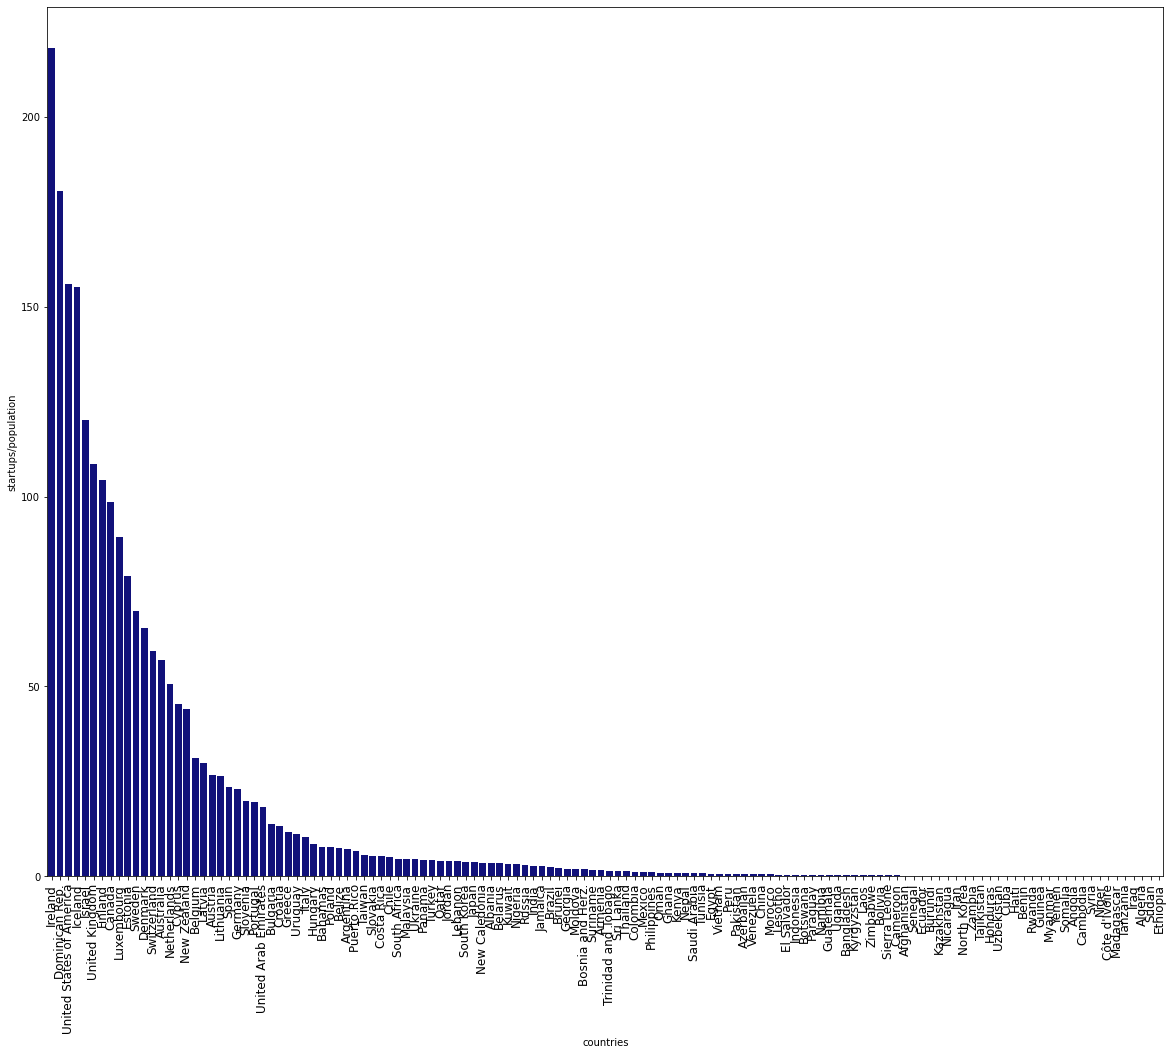

In [252]:
fig, ax = plt.subplots(figsize=(20,16))

df_population = df.sort_values("startups/population", ascending=False)
g = sns.barplot(x="countries", y="startups/population",color="darkblue",data=df_population)
g.tick_params(axis='x', rotation=90, labelsize="large", labelbottom=True)
plt.savefig('startup_population_barplots/PopulationBarplotAll.png')

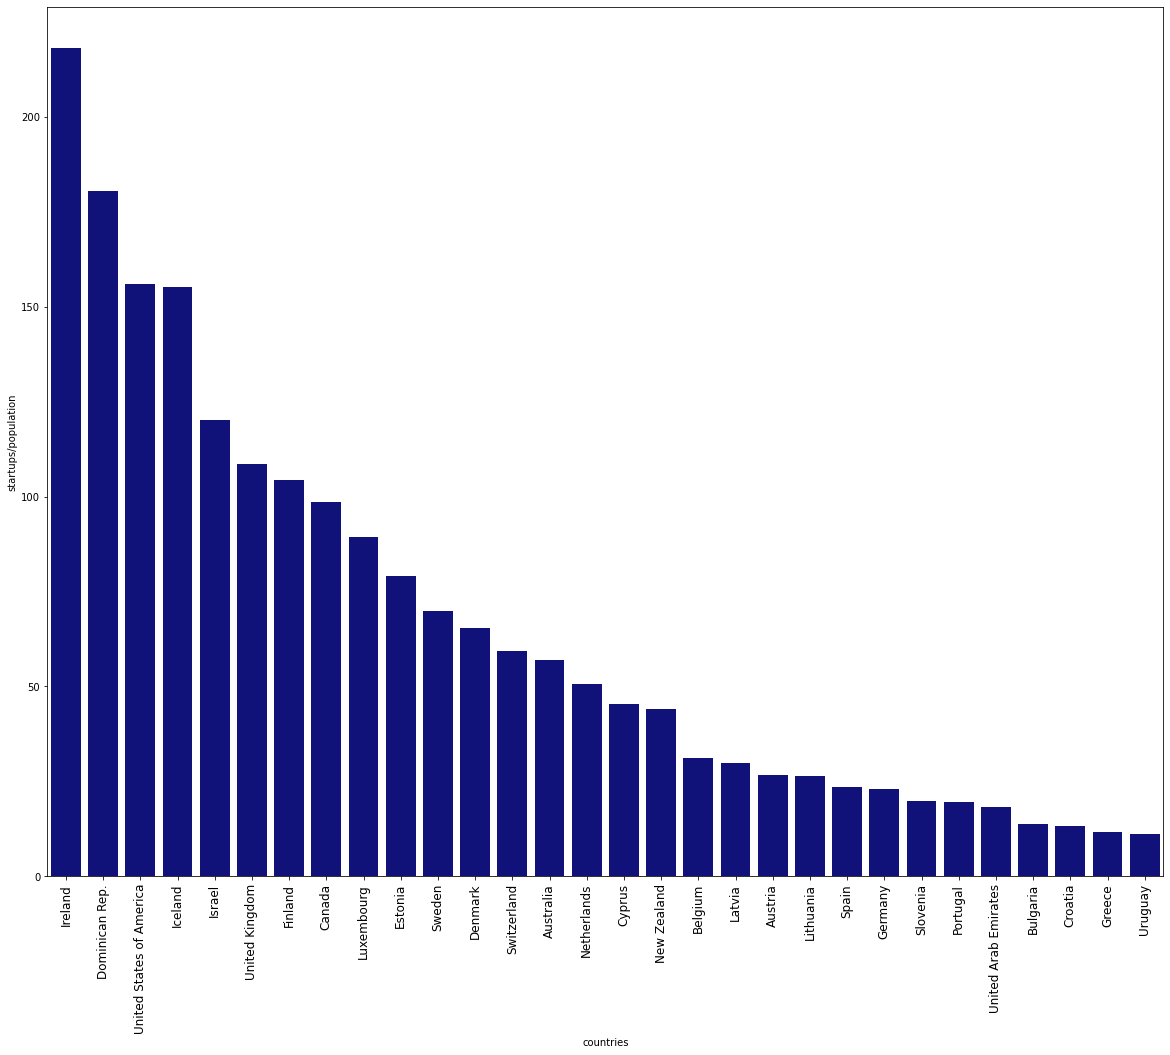

In [253]:
fig, ax = plt.subplots(figsize=(20,16))

df_population = df.sort_values("startups/population", ascending=False)
g = sns.barplot(x="countries", y="startups/population",color="darkblue",data=df_population[0:30])
g.tick_params(axis='x', rotation=90, labelsize="large", labelbottom=True)
plt.savefig('startup_population_barplots/PopulationBarplotTop30.png')

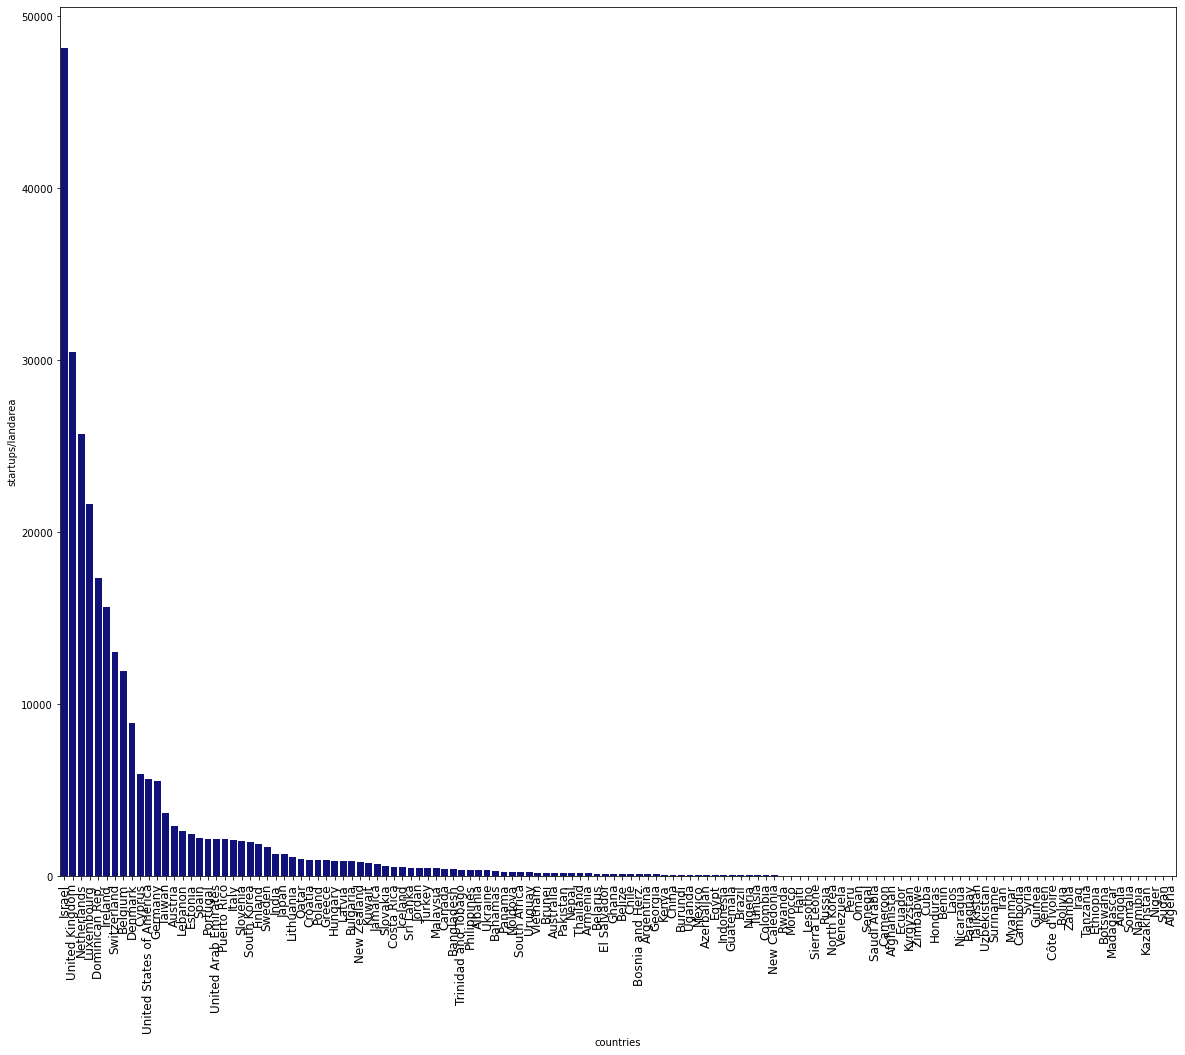

In [254]:
fig, ax = plt.subplots(figsize=(20,16))

df_landarea = df.sort_values("startups/landarea", ascending=False)
g = sns.barplot(x="countries", y="startups/landarea",color="darkblue",data=df_landarea)
g.tick_params(axis='x', rotation=90, labelsize="large", labelbottom=True)
plt.savefig('startup_population_barplots/LandareaBarplotAll.png')

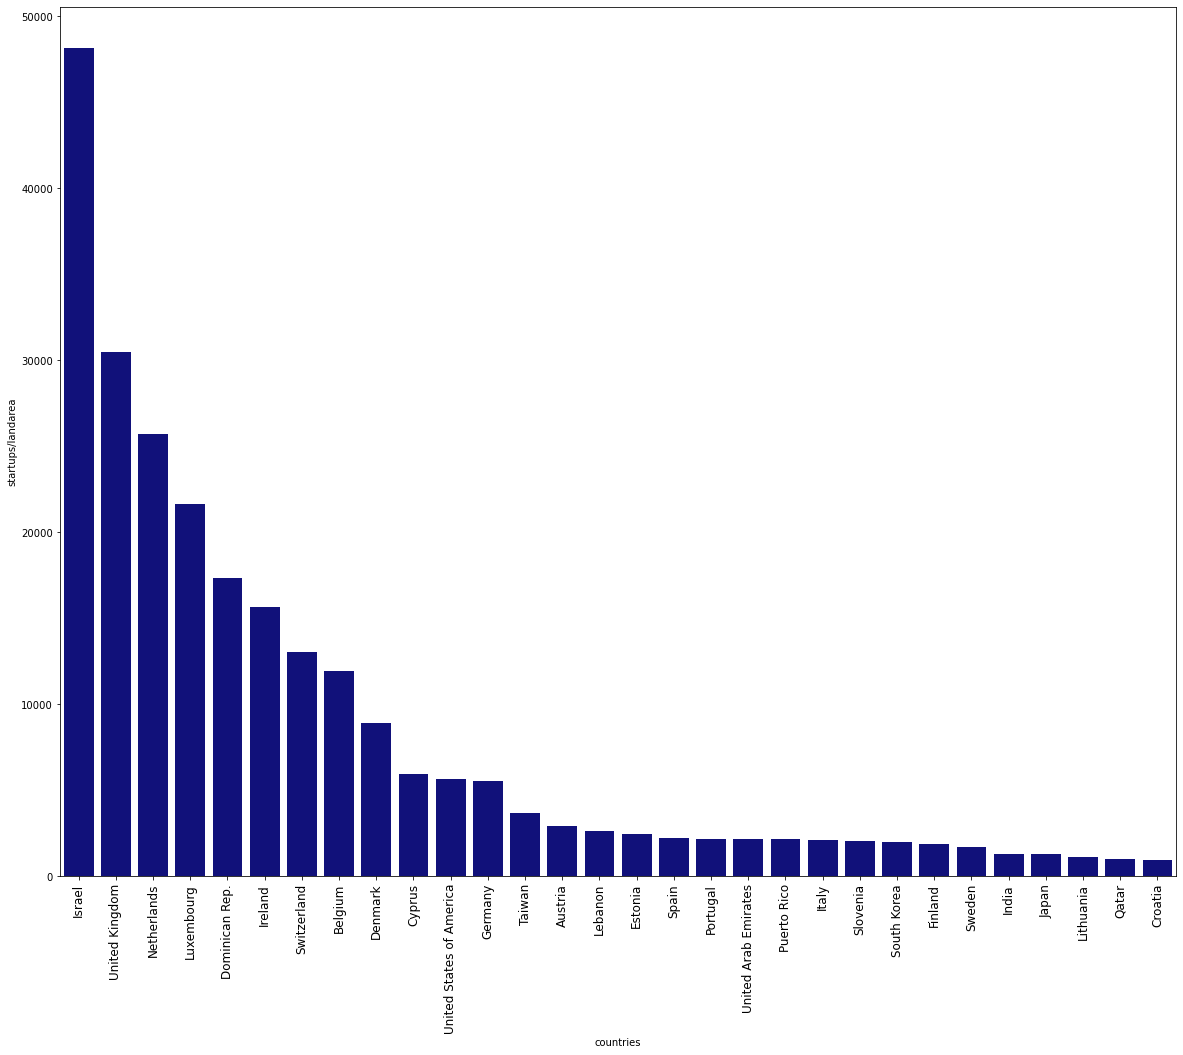

In [255]:
fig, ax = plt.subplots(figsize=(20,16))

df_landarea = df.sort_values("startups/landarea", ascending=False)
g = sns.barplot(x="countries", y="startups/landarea",color="darkblue",data=df_landarea[0:30])
g.tick_params(axis='x', rotation=90, labelsize="large", labelbottom=True)
plt.savefig('startup_population_barplots/LandareaBarplotTop30.png')

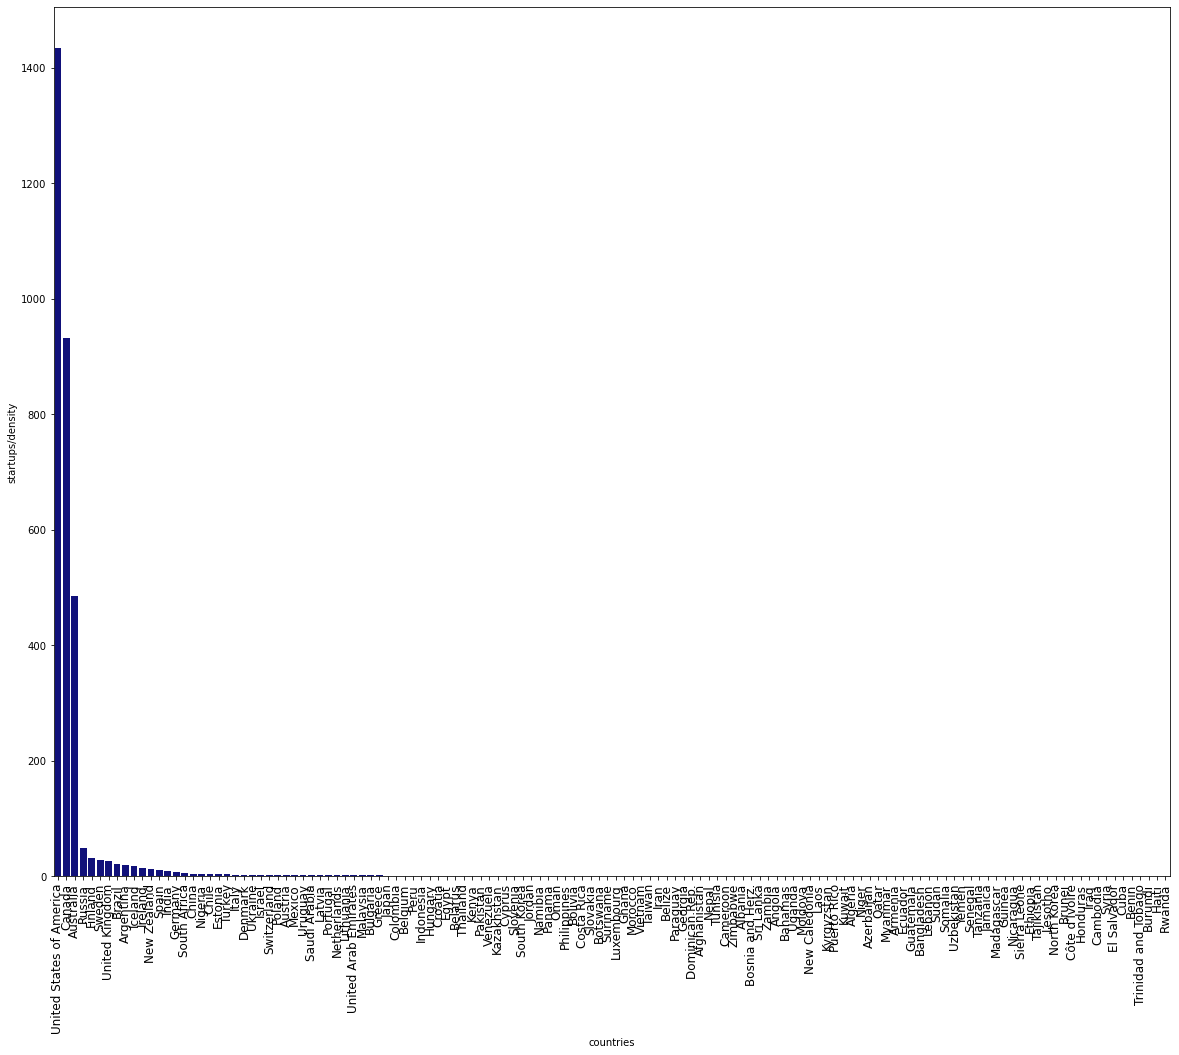

In [256]:
fig, ax = plt.subplots(figsize=(20,16))

df_density = df.sort_values("startups/density", ascending=False)
g = sns.barplot(x="countries", y="startups/density",color="darkblue",data=df_density)
g.tick_params(axis='x', rotation=90, labelsize="large", labelbottom=True)
plt.savefig('startup_population_barplots/DensityBarplotAll.png')

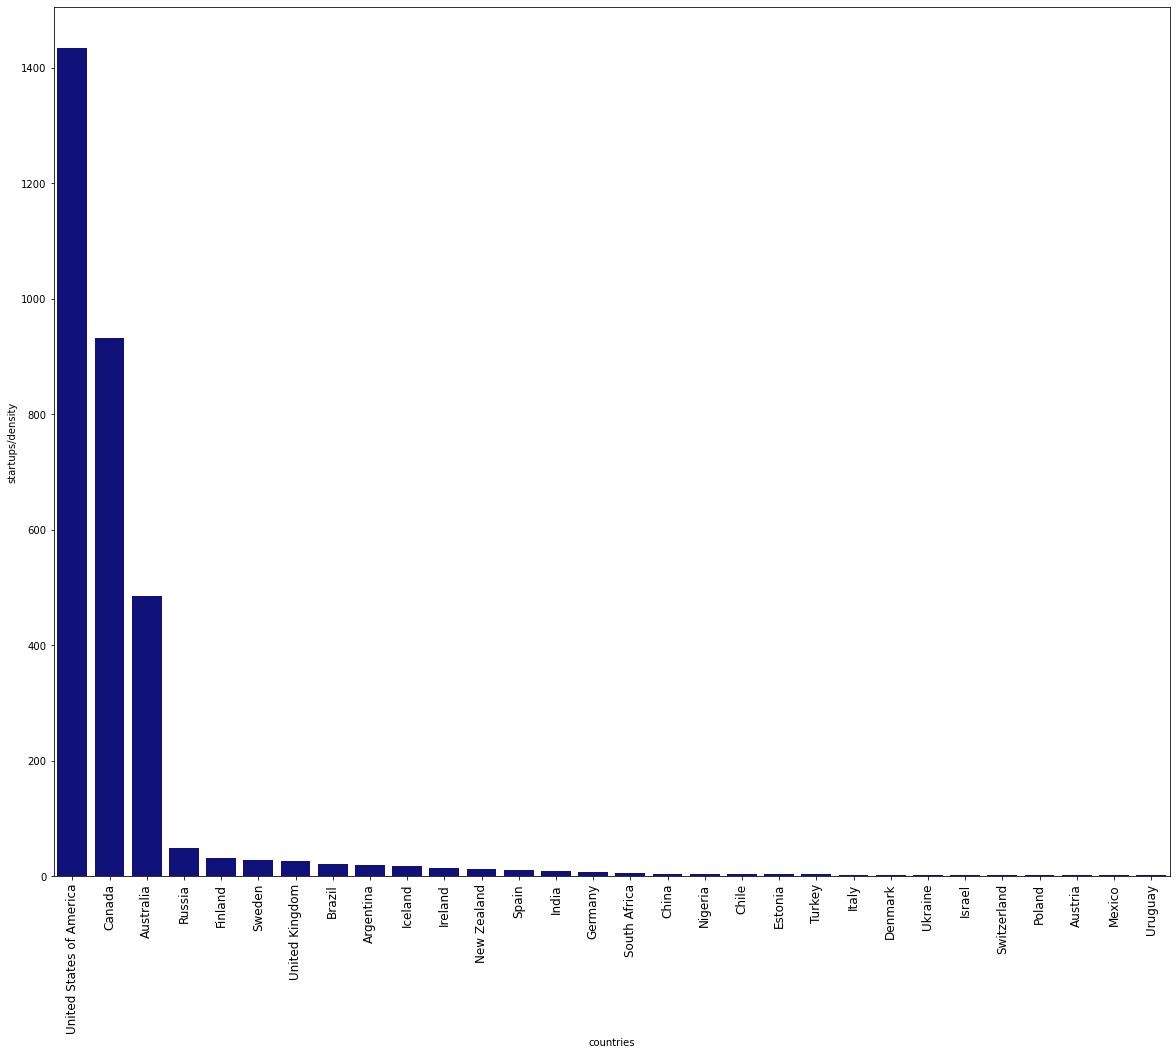

In [257]:
fig, ax = plt.subplots(figsize=(20,16))

df_density = df.sort_values("startups/density", ascending=False)
g = sns.barplot(x="countries", y="startups/density",color="darkblue",data=df_density[0:30])
g.tick_params(axis='x', rotation=90, labelsize="large", labelbottom=True)
plt.savefig('startup_population_barplots/DensityBarplotTop30.png')